In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


import acquire


In [2]:
df = acquire.get_telco_data()

Using cached csv


In [3]:
df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check


In [4]:
df.shape

(7043, 24)

In [5]:
# drops duplicate columns if there are any present
df.drop_duplicates()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [6]:
# remove any columns that don't bring any value

drop_columns= ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id']
df = df.drop(columns = drop_columns)


In [7]:
df.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [9]:
# change dtype in column from string so it can be used
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')
df['total_charges']

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [11]:
# looking at the total charges column and checking if any values are missing
df.total_charges.isna().value_counts()

False    7032
True       11
Name: total_charges, dtype: int64

In [55]:
# reassigning dataframe and dropping the null values
df = df[df.total_charges.notnull()]
df.shape

(7032, 33)

In [13]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [14]:
# more in depth view of what values these columns hold and how many
col_list = df.columns.tolist()
for col in col_list:
    if col not in ['customer_id', 'tenure', 'monthly_charges', 'total_charges']:
        print(df[col].value_counts(dropna=False))
        print('--------------')

Male      3549
Female    3483
Name: gender, dtype: int64
--------------
0    5890
1    1142
Name: senior_citizen, dtype: int64
--------------
No     3639
Yes    3393
Name: partner, dtype: int64
--------------
No     4933
Yes    2099
Name: dependents, dtype: int64
--------------
Yes    6352
No      680
Name: phone_service, dtype: int64
--------------
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
--------------
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
--------------
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
--------------
No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64
--------------
No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64
-

In [15]:
# changing 'no internet service', which is present in a lot of columns, to 'no'
df.replace('No internet service', 'No', inplace = True)

In [16]:
df.device_protection.value_counts()

No     4614
Yes    2418
Name: device_protection, dtype: int64

In [17]:
# get dummies for columns that have two values (yes,no) or gender, and dropping first
dummy_df = pd.get_dummies(df[['gender', 'partner', 'dependents', 'online_security', 'online_backup', 'phone_service',
                              'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                              'paperless_billing', 'churn']], drop_first = True)


# get dummies for columns that have more than two values
dummy_df2 = pd.get_dummies(df[['multiple_lines', 'contract_type', 'internet_service_type', 'payment_type']])

In [18]:
dummy_df2.head()

,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,0,1,0
3,1,0,0,1,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0,0,0,1


In [19]:
# dropping columns that are now duplicates, from the dummies created, or not needed

drop_cols = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'
             'gender', 'partner', 'dependents', 'online_security', 'phone_service',
             'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
             'streaming_movies', 'paperless_billing', 'churn']
df = df.drop(columns = drop_cols)

df.head()

,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
0,0,9,No,65.6,593.30,One year,DSL,Mailed check
1,0,9,Yes,59.9,542.40,Month-to-month,DSL,Mailed check
2,0,4,No,73.9,280.85,Month-to-month,Fiber optic,Electronic check
3,1,13,No,98.0,1237.85,Month-to-month,Fiber optic,Electronic check
4,1,3,No,83.9,267.40,Month-to-month,Fiber optic,Mailed check


In [20]:
# combine df and dummy_df that I created
df = pd.concat([df, dummy_df, dummy_df2], axis =1)

In [21]:
# checking the shape of df to ensure changes were made
df.iloc[:2, 14:]

,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1


In [22]:
# getting column names
df.columns.tolist()

['senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'phone_service_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [23]:
# rename column names for clarity

df.rename(columns ={ 'gender_Male': 'is_male',
                    'partner_Yes': 'has_partner',
                    'dependents_Yes': 'has_dependents',
                    'online_security_Yes': 'online_security',
                    'online_backup_Yes': 'online_backup',
                    'phone_service_Yes': 'phone_service',
                    'device_protection_Yes': 'device_protection',
                    'tech_support_Yes': 'tech_support',
                    'streaming_tv_Yes': 'streaming_tv',
                    'streaming_movies_Yes': 'streaming_movies',
                    'paperless_billing_Yes': 'paperless_billing',
                    'churn_Yes': 'churn',
                    'multiple_lines_No': 'one_line',
                    'multiple_lines_No phone service': 'no_phone_service',
                    'multiple_lines_Yes': 'has_multiple_lines',
                    'contract_type_Month-to-month': 'month_to_month_contract',
                    'contract_type_One year': 'one_year_contract',
                    'contract_type_Two year': 'two_year_contract',
                    'internet_service_type_DSL': 'dsl_internet',
                    'internet_service_type_Fiber optic': 'fiber_optic_internet',
                    'internet_service_type_None': 'no_internet_service',
                    'payment_type_Bank transfer (automatic)': 'bank_transfer_autopay',
                    'payment_type_Credit card (automatic)': 'credit_card_autopay',
                    'payment_type_Electronic check': 'electronic_check_nonauto',
                    'payment_type_Mailed check': 'mailed_check_nonauto'}, inplace = True)

In [24]:
# make sure changes were made
df.columns.tolist()

['senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'is_male',
 'has_partner',
 'has_dependents',
 'online_security',
 'online_backup',
 'phone_service',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'one_line',
 'no_phone_service',
 'has_multiple_lines',
 'month_to_month_contract',
 'one_year_contract',
 'two_year_contract',
 'dsl_internet',
 'fiber_optic_internet',
 'no_internet_service',
 'bank_transfer_autopay',
 'credit_card_autopay',
 'electronic_check_nonauto',
 'mailed_check_nonauto']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   senior_citizen            7032 non-null   int64  
 1   tenure                    7032 non-null   int64  
 2   multiple_lines            7032 non-null   object 
 3   monthly_charges           7032 non-null   float64
 4   total_charges             7032 non-null   float64
 5   contract_type             7032 non-null   object 
 6   internet_service_type     7032 non-null   object 
 7   payment_type              7032 non-null   object 
 8   is_male                   7032 non-null   uint8  
 9   has_partner               7032 non-null   uint8  
 10  has_dependents            7032 non-null   uint8  
 11  online_security           7032 non-null   uint8  
 12  online_backup             7032 non-null   uint8  
 13  phone_service             7032 non-null   uint8  
 14  device_p

In [26]:
# specify numerical columns
num_cols = ['senior_citizen', 'multiple_lines', 'contract_type', 'internet_service_type',
       'payment_type', 'is_male', 'has_partner', 'has_dependents',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']

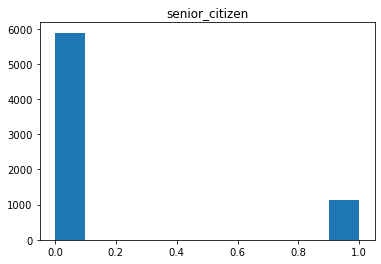

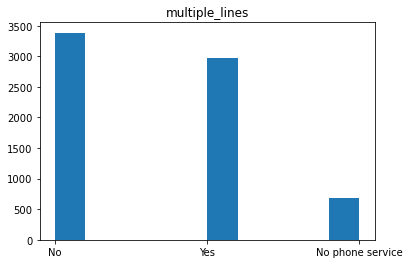

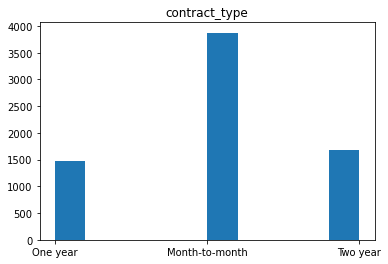

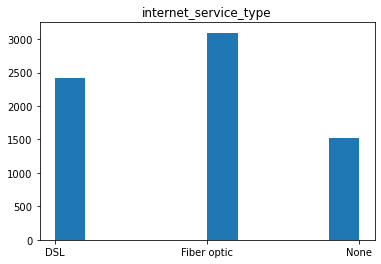

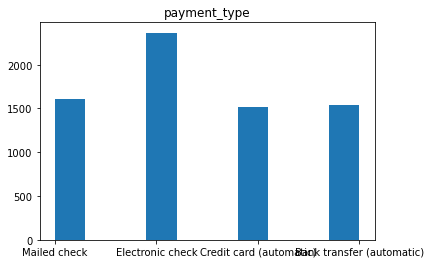

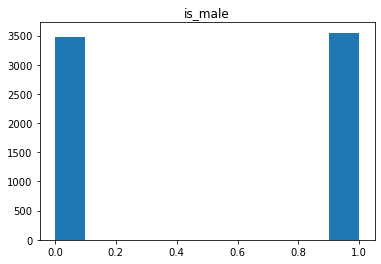

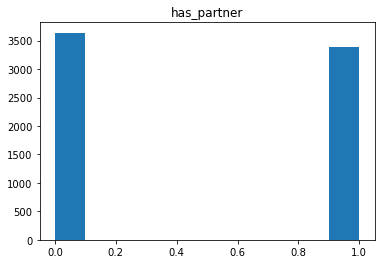

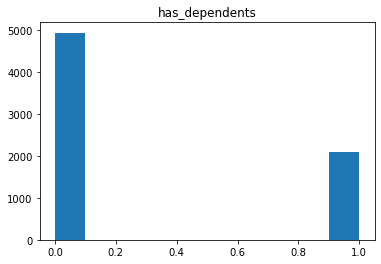

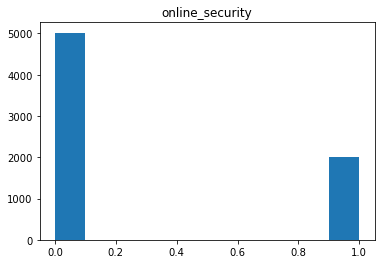

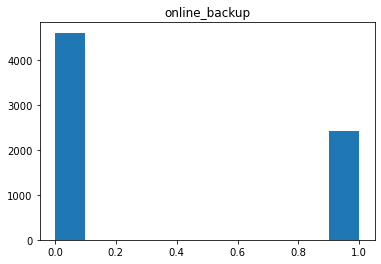

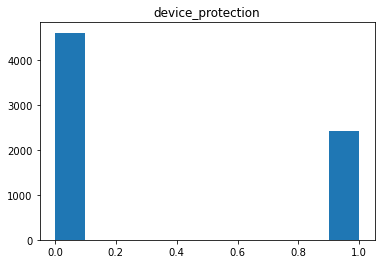

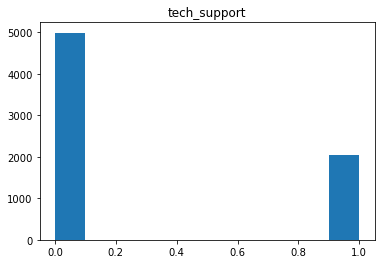

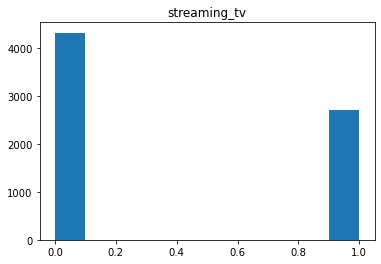

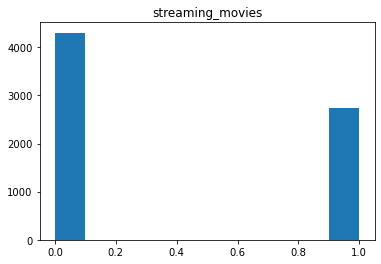

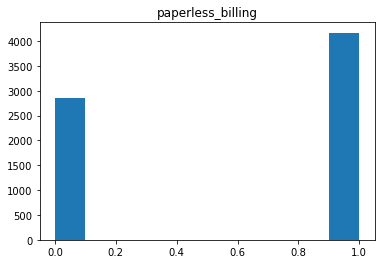

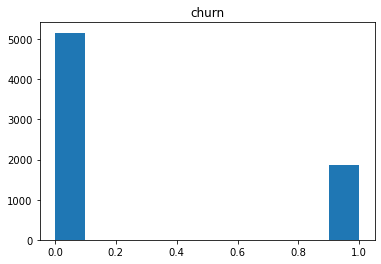

In [27]:
# create histogram for numerical columns to check out distribution
for col in num_cols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [32]:
df.monthly_charges.value_counts(bins = 4, normalize = True, sort = False)

(18.148999999999997, 43.375]    0.269198
(43.375, 68.5]                  0.195392
(68.5, 93.625]                  0.325370
(93.625, 118.75]                0.210040
Name: monthly_charges, dtype: float64

In [52]:
def split_data(df):
    '''
    This function takes in a dataframe and splits the data into train, validate and test samples. 
    Test, validate, and train are 20%, 24%, & 56% of the original dataset, respectively. 
    The function returns train, validate and test dataframes. 
    '''
    # split dataframe 80/20, stratify on churn to ensure equal proportions in both dataframes
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=123, 
                                            stratify=df.churn)
    # split previous larger dataframe by 70/30, stratify on churn
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    # results in 3 dataframes
    return train, validate, test

In [53]:
train, validate, test = split_data(df)

In [54]:
train.shape, validate.shape, test.shape

((3937, 33), (1688, 33), (1407, 33))

INITIAL QUESTIONS FOR DATA EXPLORATION

    - What is the rate of churn for monthly contracts compared to 1 year and 2 year contracts?
    
    - Is there a length of tenure before customers decide to churn?
    
    - Does service type play a key factor in the decision to churn?
    
    - What is the average charge amount for customers who churn?
    

In [68]:
train.head(3)

,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,is_male,has_partner,has_dependents,online_security,online_backup,phone_service,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,one_line,no_phone_service,has_multiple_lines,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service,bank_transfer_autopay,credit_card_autopay,electronic_check_nonauto,mailed_check_nonauto
5919,0,58,Yes,71.10,4299.20,One year,DSL,Credit card (automatic),0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1915,0,71,Yes,85.45,6028.95,One year,Fiber optic,Credit card (automatic),1,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
5054,0,35,Yes,25.75,882.55,Month-to-month,None,Electronic check,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [63]:
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [64]:
train.corr()['churn'].sort_values()

tenure                     -0.351807
two_year_contract          -0.300652
no_internet_service        -0.230842
total_charges              -0.193774
one_year_contract          -0.181010
online_security            -0.180834
has_dependents             -0.163579
tech_support               -0.159305
has_partner                -0.143203
dsl_internet               -0.134693
credit_card_autopay        -0.127314
bank_transfer_autopay      -0.111275
mailed_check_nonauto       -0.090324
online_backup              -0.068519
device_protection          -0.060108
one_line                   -0.043127
no_phone_service           -0.015906
is_male                     0.000008
phone_service               0.015906
streaming_tv                0.038849
streaming_movies            0.051348
has_multiple_lines          0.053031
senior_citizen              0.159932
paperless_billing           0.190075
monthly_charges             0.196871
electronic_check_nonauto    0.292306
fiber_optic_internet        0.321678
m

<AxesSubplot:>

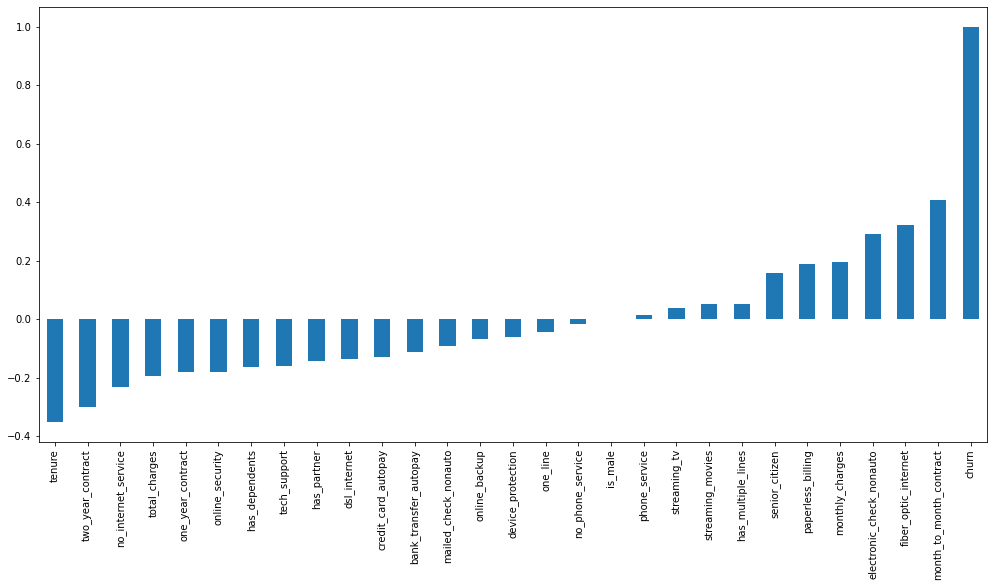

In [67]:
train.corr()['churn'].sort_values().plot(kind='bar', figsize=(17,8))

Text(0, 0.5, 'Number of Customers')

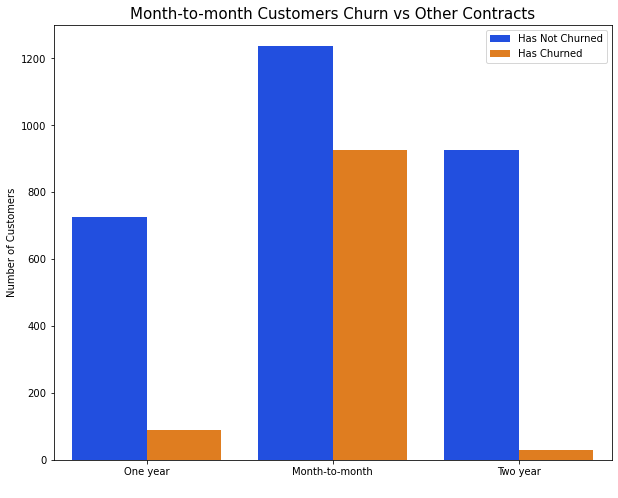

In [87]:
plt.figure(figsize = (10, 8))
sns.countplot(x='contract_type', hue = 'churn', palette = 'bright', data = train)
plt.title('Month-to-month Customers Churn vs Other Contracts', fontsize = 15)
plt.legend(labels = ['Has Not Churned', 'Has Churned'])
plt.xlabel(' ')
plt.ylabel('Number of Customers')